<a href="https://colab.research.google.com/github/ejrtks1020/Pytorch-basic/blob/main/PyTorch_ANN_%EB%B9%84%EC%84%A0%ED%98%95_%ED%99%9C%EC%84%B1%ED%99%94_%ED%95%A8%EC%88%98_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#1. 시그모이드 함수(Sigmoid function)

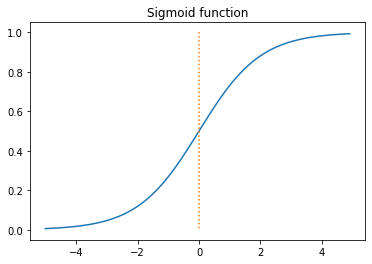

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid function')
plt.show()


* 시그모이드 함수의 출력값이 0 또는 1에 가까워 지면 그래프의 기울기가 완만해지는 모습을 볼수있다. 이부분의 기울기를 계산하면 0에 가까운 아주 작은 값이 나오는데, 역전파 과정에서 0에 가까운 아주작은 기울기가 곱해지면 앞단에는 기울기가 잘 전달되지 않아 **기울기 소실(Vanishing Gradient)**문제가 발생한다

* 즉, 앞단의 매개변수 W가 업데이트 되지않아 학습이 되지않는다.

#2. 하이퍼 볼릭 탄젠트 함수(Hyperbolic tangent function)

* 하이퍼볼릭 탄젠트함수(tanh)는 입력값을 -1과 1사이의 값으로 변환한다.

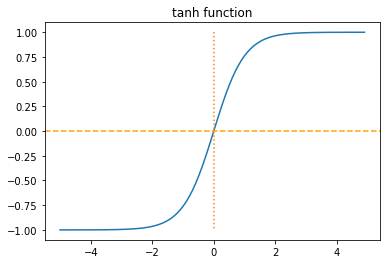

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.axhline(y = 0, color = 'orange', linestyle = '--')
#plt.axvline(x = 0, color = 'orange', linestyle = '--')
plt.title('tanh function')
plt.show()

* 하이퍼 볼릭 탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제갑 발생한다. 그러나 시그모이드 함수와는 달리 0을 중심으로 값이 변화하므로 시그모이드 함수와 달리 반환값의 변화폭이 더 크다. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은편이다.

#3. 렐루 함수(ReLU)

인공신경망에서 가장 인기있는 함수. 수식은 f(x) = max(0,x)

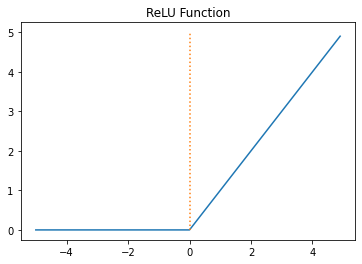

In [6]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0,0], [0, 5], linestyle=':')
plt.title('ReLU Function')
plt.show()

* 렐루 함수는 음수를 입력하면 0을 출력, 양수를 입력하면 그래도 반환한다. 특정 양수값에 수렴하지 ㅇ낞으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동한다.

* 시그모이드 함수와 하이퍼볼릭 탄제트함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산속도도 빠르다.

* 단점 : 입력값이 음수면 기울기도 0이된다. 그리고 해당 뉴런은 회생하는 것이 매우어려운데, 이문제를 죽은 ReLU(dying ReLU)라고 한다.

#4. 리키 렐루(Leaky ReLU)

* 죽은 렐루를 보완하기 위해 등장한 ReLU의 변형함수중 하나, Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환한다.

* 수식은 f(x) = max(ax, x). a는 하이퍼 파라미터로 Leaky('새는')정도를 결정하며 일반적으로는 0.01의 값을 가진다.


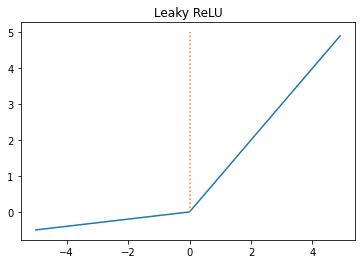

In [8]:
a=0.1
def leaky_relu(x):
  return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0], [0, 5], ':')
plt.title('Leaky ReLU')
plt.show()

#5.소프트 맥스 함수(Softmax function)

분류문제를 로지스틱회귀와 소프트맥스 회귀를 출력층에 적용하여 사용


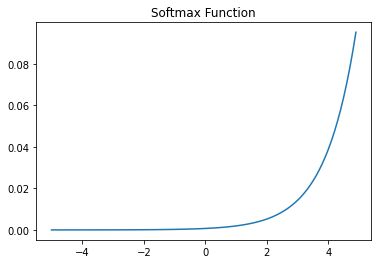

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()

* 소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수는 **이진 분류(Binary Classification)**문제에 주로 사용 된다면 소프트 맥스함수는 세가지 이상의(상호 배타적인) 선택지 중 하나를 고르는 **다중 클래스 분류(MultiClass Classification)**문제에 주로 사용됨